In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
img = Image.open("images/empire.jpg").convert('L') # Convert to grayscale
img = np.array(img) # Convert to numpy.array
n_bins = len(np.unique(img)) - 1

Distribution of image values

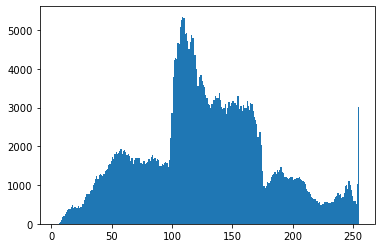

In [3]:
plt.hist(img.flatten(), bins=n_bins-1)
plt.show()

Function of **histogram_equalization** using `numpy`

In [4]:
def histogram_equaliztion(img, n_bins=None):
    """ Histogram equalization of a grayscale image."""
    if not n_bins:
        n_bins = len(np.unique(img)) - 1
        
    count, bins = np.histogram(img.flatten(), bins = n_bins)
    
    cdf = count.cumsum() # Cumulative Distribution Function
    cdf = 255* (cdf - cdf.min())/(cdf.max() - cdf.min()) # Normalize
    new_img = np.interp(img.flatten(), bins[:-1], cdf)
    new_img = new_img.reshape(img.shape)
    new_img = new_img.astype(img.dtype)
    return new_img, cdf

Applying **histogram_equalization**

In [5]:
new_img, cdf = histogram_equaliztion(img)

Comparing result with original image

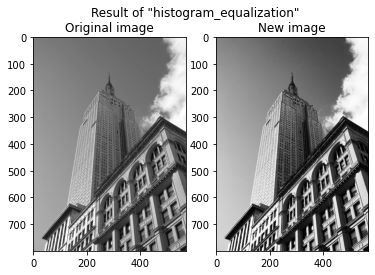

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Result of "histogram_equalization"')

ax1.imshow(img, cmap='gray')
ax1.set_title('Original image')

ax2.imshow(new_img, cmap='gray')
ax2.set_title('New image')
plt.show()

Comparing histogram of distributions

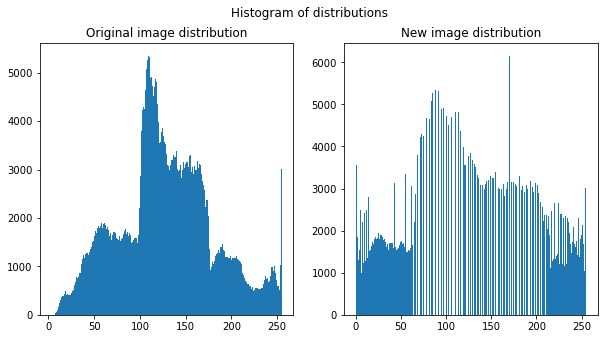

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Histogram of distributions')

ax1.hist(img.flatten(), bins=n_bins)
ax1.set_title('Original image distribution')

ax2.hist(new_img.flatten(), bins=n_bins)
ax2.set_title('New image distribution')
plt.show()